Required Libraries

In [ ]:
import pandas as pd
import numpy as np
from random import random
import math

Reading Dataset from the drive 

In [ ]:
projects_path = '/content/drive/MyDrive/SE_Project_Data/Projects.csv'
developers_path = '/content/drive/MyDrive/SE_Project_Data/Developers.csv'
commits_path = '/content/drive/MyDrive/SE_Project_Data/Final_Commits.csv'
commits_count = '/content/drive/MyDrive/SE_Project_Data/Final_projects_Commits_count.csv'

df_projects = pd.read_csv(projects_path)
df_developers = pd.read_csv(developers_path)
df_commits = pd.read_csv(commits_path)
df_commit_count = pd.read_csv(commits_count)


df_projects.head()

,id,url,owner_id,name,description,language,created_at,forked_from,deleted,updated_at,forked_commit_id,repo_id,total_developers
0,141366,https://api.github.com/repos/mulesoft/mule-mod...,7037,mule-module-jpa,Mule JPA Module,Java,2012-07-17 16:41:00 UTC,NaN,False,2016-10-17 11:35:20 UTC,NaN,141366,103
1,165081,https://api.github.com/repos/openmrs/openmrs-m...,11926,openmrs-module-htmlwidgets,A set of reusable HTML form field widgets in o...,Java,2012-06-18 18:45:46 UTC,NaN,False,2016-10-17 15:13:51 UTC,NaN,165081,34
2,10862352,https://api.github.com/repos/versionone/Versio...,121412,VersionOne.Integration.GitSCM,Links VersionOne workitems to Git commits.,Java,2012-10-15 18:40:05 UTC,NaN,False,2016-03-05 23:21:26 UTC,NaN,10862352,42
3,11077845,https://api.github.com/repos/futurice/android-...,122957,android-best-practices,"Do's and Don'ts for Android development, by Fu...",Java,2014-07-29 09:09:44 UTC,NaN,False,2016-02-17 00:46:22 UTC,NaN,11077845,113
4,10496702,https://api.github.com/repos/coinbase/coinbase...,1460253,coinbase-java,Coinbase API v1 library for Java,Java,2014-01-08 01:27:07 UTC,NaN,False,2016-02-11 09:07:13 UTC,NaN,10496702,25


Extracting aprroprite developers with proper time difference of project creation and project joining

In [ ]:
df_developers['Project_created_at'] = pd.to_datetime(df_developers['Project_created_at'])
df_developers['Joined_at'] = pd.to_datetime(df_developers['Joined_at'])

df_developers = df_developers.sort_values(['id'])
Timediff = df_developers['Joined_at'] - df_developers['Project_created_at']
df_developers['time_diff'] = Timediff
df_developers_extracted = df_developers[df_developers['time_diff'] >=  np.timedelta64(0, 'h')].sort_values(['time_diff'])
display(df_developers_extracted)

,id,user_created_at,login,repo_id,Joined_at,Project_created_at,time_diff
1680,34965,2009-10-23 00:25:05 UTC,eighthave,143873,2012-03-22 16:26:37+00:00,2012-03-22 16:26:37+00:00,0 days 00:00:00
4060,4007910,2014-03-25 14:39:49 UTC,samuelhl,9785556,2014-04-23 07:16:32+00:00,2014-04-23 07:16:32+00:00,0 days 00:00:00
882,29819,2008-10-24 12:54:38 UTC,n8fr8,143873,2012-03-22 16:26:37+00:00,2012-03-22 16:26:37+00:00,0 days 00:00:00
4945,3999498,2014-02-03 10:14:18 UTC,ed1000,9768511,2013-06-04 09:09:36+00:00,2013-06-04 09:09:36+00:00,0 days 00:00:00
5975,81083,2009-11-14 19:40:11 UTC,harlo,143873,2012-03-22 16:26:37+00:00,2012-03-22 16:26:37+00:00,0 days 00:00:00
...,...,...,...,...,...,...,...
3386,3866545,2014-04-25 03:10:53 UTC,0u812,3807664,2017-02-28 13:05:29+00:00,2012-04-03 22:52:58+00:00,1791 days 14:12:31
15639,3866545,2014-04-25 03:10:53 UTC,0u812,3499405,2017-02-28 13:05:29+00:00,2012-04-03 22:51:50+00:00,1791 days 14:13:39
15165,3866545,2014-04-25 03:10:53 UTC,0u812,3484361,2017-02-28 13:05:29+00:00,2012-03-27 08:15:17+00:00,1799 days 04:50:12
3791,297169,2011-02-23 12:59:34 UTC,gered,7538,2017-03-23 21:00:07+00:00,2012-04-11 04:23:22+00:00,1807 days 16:36:45


In [ ]:
df_commit_count.head()

,project_id,total_commits
0,190,279
1,313,3718
2,366,1107
3,1041,1632
4,1842,3256


In [ ]:
df_projects = pd.merge(df_projects, df_commit_count, left_on=['id'], right_on=['project_id'])
display(df_projects)

,id,url,owner_id,name,description,language,created_at,forked_from,deleted,updated_at,forked_commit_id,repo_id,total_developers,project_id,total_commits
0,141366,https://api.github.com/repos/mulesoft/mule-mod...,7037,mule-module-jpa,Mule JPA Module,Java,2012-07-17 16:41:00 UTC,NaN,False,2016-10-17 11:35:20 UTC,NaN,141366,103,141366,101
1,165081,https://api.github.com/repos/openmrs/openmrs-m...,11926,openmrs-module-htmlwidgets,A set of reusable HTML form field widgets in o...,Java,2012-06-18 18:45:46 UTC,NaN,False,2016-10-17 15:13:51 UTC,NaN,165081,34,165081,58
2,10862352,https://api.github.com/repos/versionone/Versio...,121412,VersionOne.Integration.GitSCM,Links VersionOne workitems to Git commits.,Java,2012-10-15 18:40:05 UTC,NaN,False,2016-03-05 23:21:26 UTC,NaN,10862352,42,10862352,29
3,11077845,https://api.github.com/repos/futurice/android-...,122957,android-best-practices,"Do's and Don'ts for Android development, by Fu...",Java,2014-07-29 09:09:44 UTC,NaN,False,2016-02-17 00:46:22 UTC,NaN,11077845,113,11077845,157
4,10496702,https://api.github.com/repos/coinbase/coinbase...,1460253,coinbase-java,Coinbase API v1 library for Java,Java,2014-01-08 01:27:07 UTC,NaN,False,2016-02-11 09:07:13 UTC,NaN,10496702,25,10496702,265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,36383,https://api.github.com/repos/motech/ananya-kil...,10194,ananya-kilkari,mtraining,Java,2012-06-07 09:15:45 UTC,NaN,False,2016-10-11 22:26:30 UTC,NaN,36383,49,36383,609
2767,9981822,https://api.github.com/repos/spring-guides/gs-...,2546696,gs-maven-yarn,Building Spring YARN Projects with Maven :: Le...,Java,2014-02-11 16:18:22 UTC,NaN,False,2016-03-04 09:08:32 UTC,NaN,9981822,49,9981822,7
2768,11066128,https://api.github.com/repos/RentTheRunway/alc...,282283,alchemy,A/B experiments service,Java,2014-03-26 17:02:29 UTC,NaN,False,2016-03-02 18:49:33 UTC,NaN,11066128,49,11066128,131
2769,5613772,https://api.github.com/repos/pentaho/pentaho-k...,15652,pentaho-kettle,Pentaho Data Integration ( ETL ) a.k.a Kettle,Java,2013-10-08 18:27:11 UTC,NaN,False,2016-03-01 21:14:16 UTC,NaN,5613772,49,5613772,16808


## total = total number of developers who has number of commits more than 6

In [ ]:
df_commits.head()

,project_id,committer_id,total
0,43674889,3477701,144
1,40584,29083,106
2,11851725,2771945,53
3,2565607,1369339,120
4,15539370,6594791,171


In [ ]:
from datetime import datetime

current_time = datetime.now().strftime('%Y-%m-%dT%H:%M:%S.%f')
current_time = np.datetime64(current_time)

sorted_developers = df_developers.sort_values(by=['repo_id'])
repo_id = df_developers['repo_id'].to_numpy()
time_joined = df_developers['Joined_at'].to_numpy()

first_membership_dictionary = {}

for i in range(len(repo_id)):
  key = repo_id[i]
  joined_t = np.datetime64(time_joined[i])
  time_diff = current_time - joined_t
  if key in first_membership_dictionary.keys():
    if first_membership_dictionary[key] <= time_diff:
      first_membership_dictionary[key] = time_diff
  else:
    first_membership_dictionary[key] = time_diff

values = list(first_membership_dictionary.values())
keys = list(first_membership_dictionary.keys())
print(first_membership_dictionary)
print(len(keys))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  


{23646: numpy.timedelta64(318222241519515,'us'), 36089: numpy.timedelta64(316404571519515,'us'), 92173: numpy.timedelta64(318222040519515,'us'), 356780: numpy.timedelta64(317700176519515,'us'), 12167145: numpy.timedelta64(296569135519515,'us'), 9801465: numpy.timedelta64(250645009519515,'us'), 9705511: numpy.timedelta64(251459625519515,'us'), 10247465: numpy.timedelta64(247980056519515,'us'), 11360825: numpy.timedelta64(243840041519515,'us'), 10123018: numpy.timedelta64(252839480519515,'us'), 9700164: numpy.timedelta64(250331236519515,'us'), 10244863: numpy.timedelta64(252750712519515,'us'), 10550736: numpy.timedelta64(246857659519515,'us'), 10513482: numpy.timedelta64(251518898519515,'us'), 19936463: numpy.timedelta64(176475826519515,'us'), 18761725: numpy.timedelta64(176475826519515,'us'), 19065702: numpy.timedelta64(176475826519515,'us'), 10480773: numpy.timedelta64(247227455519515,'us'), 11153905: numpy.timedelta64(243571639519515,'us'), 32558775: numpy.timedelta64(192489787519515,

In [ ]:
projects = df_commits['project_id'].to_numpy()
commiter_id = df_commits['total'].to_numpy()
onboarding_decisions = {}

for i in range(len(projects)):
  key = projects[i]
  user = commiter_id[i]

  if key in onboarding_decisions.keys():
    onboarding_decisions[key] += 1
  else:
    onboarding_decisions[key] = 1



In [ ]:
from datetime import datetime

current_time = datetime.now().strftime('%Y-%m-%dT%H:%M:%S.%f')
current_time = np.datetime64(current_time)

sorted_developers = df_developers.sort_values(by=['repo_id'])
repo_id = df_developers['repo_id'].to_numpy()
time_joined = df_developers['Joined_at'].to_numpy()

first_membership_dictionary = {}

for i in range(len(repo_id)):
  key = repo_id[i]
  joined_t = np.datetime64(time_joined[i])
  time_diff = current_time - joined_t
  if key in first_membership_dictionary.keys():
    if first_membership_dictionary[key] <= time_diff:
      first_membership_dictionary[key] = time_diff
  else:
    first_membership_dictionary[key] = time_diff

values = list(first_membership_dictionary.values())
keys = list(first_membership_dictionary.keys())
print(first_membership_dictionary)
print(len(keys))

{23646: numpy.timedelta64(318222256474977,'us'), 36089: numpy.timedelta64(316404586474977,'us'), 92173: numpy.timedelta64(318222055474977,'us'), 356780: numpy.timedelta64(317700191474977,'us'), 12167145: numpy.timedelta64(296569150474977,'us'), 9801465: numpy.timedelta64(250645024474977,'us'), 9705511: numpy.timedelta64(251459640474977,'us'), 10247465: numpy.timedelta64(247980071474977,'us'), 11360825: numpy.timedelta64(243840056474977,'us'), 10123018: numpy.timedelta64(252839495474977,'us'), 9700164: numpy.timedelta64(250331251474977,'us'), 10244863: numpy.timedelta64(252750727474977,'us'), 10550736: numpy.timedelta64(246857674474977,'us'), 10513482: numpy.timedelta64(251518913474977,'us'), 19936463: numpy.timedelta64(176475841474977,'us'), 18761725: numpy.timedelta64(176475841474977,'us'), 19065702: numpy.timedelta64(176475841474977,'us'), 10480773: numpy.timedelta64(247227470474977,'us'), 11153905: numpy.timedelta64(243571654474977,'us'), 32558775: numpy.timedelta64(192489802474977,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  


In [ ]:
final_project_ids = list(set(keys).intersection(list(onboarding_decisions.keys())))

In [ ]:
df_onb_dec = pd.DataFrame()
df_onb_dec['id'] = final_project_ids
df_onb_dec['total_onb_dec'] = [onboarding_decisions[i] for i in final_project_ids]
df_onb_dec['first_membership'] = [first_membership_dictionary[i] for i in final_project_ids]

In [ ]:
display(df_onb_dec)

,id,total_onb_dec,first_membership
0,11337735,5,2809 days 12:53:42.474977
1,9641994,2,2923 days 12:29:07.474977
2,909323,20,3498 days 14:56:33.474977
3,13131792,11,2724 days 11:20:39.474977
4,11763737,2,2785 days 05:59:04.474977
...,...,...,...
2309,9150441,8,2932 days 04:37:54.474977
2310,12959722,2,2737 days 19:16:47.474977
2311,11345906,1,2808 days 21:38:37.474977
2312,9977852,2,2913 days 16:29:05.474977


In [ ]:
display(df_projects)

,id,url,owner_id,name,description,language,created_at,forked_from,deleted,updated_at,forked_commit_id,repo_id,total_developers,project_id,total_commits
0,141366,https://api.github.com/repos/mulesoft/mule-mod...,7037,mule-module-jpa,Mule JPA Module,Java,2012-07-17 16:41:00 UTC,NaN,False,2016-10-17 11:35:20 UTC,NaN,141366,103,141366,101
1,165081,https://api.github.com/repos/openmrs/openmrs-m...,11926,openmrs-module-htmlwidgets,A set of reusable HTML form field widgets in o...,Java,2012-06-18 18:45:46 UTC,NaN,False,2016-10-17 15:13:51 UTC,NaN,165081,34,165081,58
2,10862352,https://api.github.com/repos/versionone/Versio...,121412,VersionOne.Integration.GitSCM,Links VersionOne workitems to Git commits.,Java,2012-10-15 18:40:05 UTC,NaN,False,2016-03-05 23:21:26 UTC,NaN,10862352,42,10862352,29
3,11077845,https://api.github.com/repos/futurice/android-...,122957,android-best-practices,"Do's and Don'ts for Android development, by Fu...",Java,2014-07-29 09:09:44 UTC,NaN,False,2016-02-17 00:46:22 UTC,NaN,11077845,113,11077845,157
4,10496702,https://api.github.com/repos/coinbase/coinbase...,1460253,coinbase-java,Coinbase API v1 library for Java,Java,2014-01-08 01:27:07 UTC,NaN,False,2016-02-11 09:07:13 UTC,NaN,10496702,25,10496702,265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,36383,https://api.github.com/repos/motech/ananya-kil...,10194,ananya-kilkari,mtraining,Java,2012-06-07 09:15:45 UTC,NaN,False,2016-10-11 22:26:30 UTC,NaN,36383,49,36383,609
2767,9981822,https://api.github.com/repos/spring-guides/gs-...,2546696,gs-maven-yarn,Building Spring YARN Projects with Maven :: Le...,Java,2014-02-11 16:18:22 UTC,NaN,False,2016-03-04 09:08:32 UTC,NaN,9981822,49,9981822,7
2768,11066128,https://api.github.com/repos/RentTheRunway/alc...,282283,alchemy,A/B experiments service,Java,2014-03-26 17:02:29 UTC,NaN,False,2016-03-02 18:49:33 UTC,NaN,11066128,49,11066128,131
2769,5613772,https://api.github.com/repos/pentaho/pentaho-k...,15652,pentaho-kettle,Pentaho Data Integration ( ETL ) a.k.a Kettle,Java,2013-10-08 18:27:11 UTC,NaN,False,2016-03-01 21:14:16 UTC,NaN,5613772,49,5613772,16808


In [ ]:
df_projects_onb_dec = df_projects.merge(df_onb_dec, how='inner', on=['id'])


In [ ]:
display(df_projects_onb_dec)

,id,url,owner_id,name,description,language,created_at,forked_from,deleted,updated_at,forked_commit_id,repo_id,total_developers,project_id,total_commits,total_onb_dec,first_membership
0,141366,https://api.github.com/repos/mulesoft/mule-mod...,7037,mule-module-jpa,Mule JPA Module,Java,2012-07-17 16:41:00 UTC,NaN,False,2016-10-17 11:35:20 UTC,NaN,141366,103,141366,101,2,3564 days 10:07:59.474977
1,165081,https://api.github.com/repos/openmrs/openmrs-m...,11926,openmrs-module-htmlwidgets,A set of reusable HTML form field widgets in o...,Java,2012-06-18 18:45:46 UTC,NaN,False,2016-10-17 15:13:51 UTC,NaN,165081,34,165081,58,3,3593 days 08:03:13.474977
2,10862352,https://api.github.com/repos/versionone/Versio...,121412,VersionOne.Integration.GitSCM,Links VersionOne workitems to Git commits.,Java,2012-10-15 18:40:05 UTC,NaN,False,2016-03-05 23:21:26 UTC,NaN,10862352,42,10862352,29,1,3474 days 08:08:54.474977
3,11077845,https://api.github.com/repos/futurice/android-...,122957,android-best-practices,"Do's and Don'ts for Android development, by Fu...",Java,2014-07-29 09:09:44 UTC,NaN,False,2016-02-17 00:46:22 UTC,NaN,11077845,113,11077845,157,3,2822 days 17:39:15.474977
4,10496702,https://api.github.com/repos/coinbase/coinbase...,1460253,coinbase-java,Coinbase API v1 library for Java,Java,2014-01-08 01:27:07 UTC,NaN,False,2016-02-11 09:07:13 UTC,NaN,10496702,25,10496702,265,4,3025 days 00:21:52.474977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,36383,https://api.github.com/repos/motech/ananya-kil...,10194,ananya-kilkari,mtraining,Java,2012-06-07 09:15:45 UTC,NaN,False,2016-10-11 22:26:30 UTC,NaN,36383,49,36383,609,16,3604 days 17:33:14.474977
2310,9981822,https://api.github.com/repos/spring-guides/gs-...,2546696,gs-maven-yarn,Building Spring YARN Projects with Maven :: Le...,Java,2014-02-11 16:18:22 UTC,NaN,False,2016-03-04 09:08:32 UTC,NaN,9981822,49,9981822,7,1,2990 days 09:30:37.474977
2311,11066128,https://api.github.com/repos/RentTheRunway/alc...,282283,alchemy,A/B experiments service,Java,2014-03-26 17:02:29 UTC,NaN,False,2016-03-02 18:49:33 UTC,NaN,11066128,49,11066128,131,2,2947 days 08:46:30.474977
2312,5613772,https://api.github.com/repos/pentaho/pentaho-k...,15652,pentaho-kettle,Pentaho Data Integration ( ETL ) a.k.a Kettle,Java,2013-10-08 18:27:11 UTC,NaN,False,2016-03-01 21:14:16 UTC,NaN,5613772,49,5613772,16808,115,3116 days 08:21:48.474977


In [ ]:
x = df_projects[df_projects['id'] == 10100483]
display(x)

,id,url,owner_id,name,description,language,created_at,forked_from,deleted,updated_at,forked_commit_id,repo_id,total_developers,project_id,total_commits
1584,10100483,https://api.github.com/repos/SolidStateGroup/p...,4208423,patientview,PatientView,Java,2014-05-20 08:26:26 UTC,NaN,False,2016-03-04 06:22:27 UTC,NaN,10100483,7,10100483,4051


In [ ]:
df_final_features = pd.DataFrame()

df_final_features['total_commits'] = df_projects_onb_dec['total_commits']
df_final_features['total_onb_dec'] = df_projects_onb_dec['total_onb_dec']
df_final_features['first_membership'] = df_projects_onb_dec['first_membership']
df_final_features_sorted = df_final_features.sort_values(by='total_onb_dec', ascending= False)
df_final_features['first_membership'] = df_final_features['first_membership'].dt.days.astype('int16')
display(df_final_features)
df_final_features.dtypes

,total_commits,total_onb_dec,first_membership
0,101,2,3564
1,58,3,3593
2,29,1,3474
3,157,3,2822
4,265,4,3025
...,...,...,...
2309,609,16,3604
2310,7,1,2990
2311,131,2,2947
2312,16808,115,3116


total_commits       int64
total_onb_dec       int64
first_membership    int16
dtype: object

Normalizing Dataset values

In [ ]:
from sklearn import preprocessing

norm_data = preprocessing.normalize(df_final_features)
normalized_df = pd.DataFrame(norm_data, columns=['total_commits', 'total_onb_dec', 'first_membership'])
normalized_df.head()

,total_commits,total_onb_dec,first_membership
0,0.028328,0.000561,0.999599
1,0.016140,0.000835,0.999869
2,0.008347,0.000288,0.999965
3,0.055548,0.001061,0.998455
4,0.087269,0.001317,0.996184


Probabilistic function for Ranking task

In [ ]:

onb_dec_component = np.sqrt(normalized_df['total_onb_dec'] * 0.1 * 2 )

normalized_df['onb_probability'] = onb_dec_component * 0.1
display(normalized_df)

,total_commits,total_onb_dec,first_membership,onb_probability
0,0.028328,0.000561,0.999599,0.001059
1,0.016140,0.000835,0.999869,0.001292
2,0.008347,0.000288,0.999965,0.000759
3,0.055548,0.001061,0.998455,0.001457
4,0.087269,0.001317,0.996184,0.001623
...,...,...,...,...
2309,0.166615,0.004377,0.986012,0.002959
2310,0.002341,0.000334,0.999997,0.000818
2311,0.044408,0.000678,0.999013,0.001164
2312,0.983224,0.006727,0.182278,0.003668


In [ ]:
sorted = normalized_df.sort_values(by='onb_probability', ascending= False)

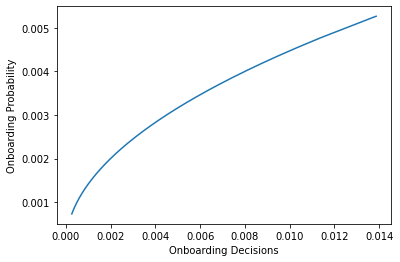

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = sorted['total_onb_dec']
ypoints = sorted['onb_probability']

plt.xlabel('Onboarding Decisions')
plt.ylabel('Onboarding Probability')

plt.plot(xpoints, ypoints)
plt.show()

In [ ]:
mean_onb_prob = normalized_df.onb_probability.mean()

onb_dec = normalized_df['onb_probability'].to_numpy()
labels = []

for i in range(len(onb_dec)):
  if onb_dec[i] > mean_onb_prob:
    labels.append(1)
  else:
    labels.append(0)

print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 

Class Distribution

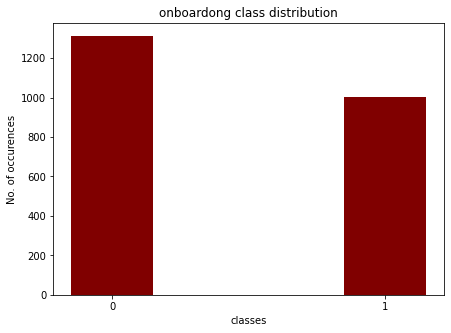

In [ ]:

  
fig = plt.figure(figsize = (7, 5))
 
# creating the bar plot
plt.bar('0', labels.count(0), color ='maroon',
        width = 0.3)
plt.bar('1', labels.count(1), color ='maroon',
        width = 0.3)
 
plt.xlabel("classes")
plt.ylabel("No. of occurences")
plt.title("onboardong class distribution")
plt.show()

# Training

In [ ]:
x_train_ = normalized_df[normalized_df.columns[0:3]].to_numpy()
print(x_train_)

[[2.83275680e-02 5.60941940e-04 9.99598537e-01]
 [1.61403909e-02 8.34847804e-04 9.99869387e-01]
 [8.34743478e-03 2.87842579e-04 9.99965118e-01]
 ...
 [4.44081217e-02 6.77986592e-04 9.99013243e-01]
 [9.83224048e-01 6.72719928e-03 1.82277852e-01]
 [2.58708395e-01 6.43419843e-03 9.65934039e-01]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_, labels, test_size=0.25, random_state=42)

In [ ]:
# Function for sigmoid activation
def transfer(activation):
	return 1.0 / (1.0 + np.exp(-activation))

In [ ]:
# Derivative of Sigmoid
def transfer_derivative(output):
	return transfer(output) * (1.0 - transfer(output))

In [ ]:
# softmax as transfer function for the hidden layer to output layer 
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

In [ ]:
# Predicting and Calculating Training accuracy
def predict(input):
  output = softmax(np.dot(transfer(np.dot(input, weightHiddenLayer) + biasHiddenLayer), weightOutputLayer) + biasOutputLayer)
  predictedLabels = []
  for out in output:
    predictedLabels.append(np.argmax(out))
  return predictedLabels

In [ ]:
def print_evaluation(golds, predictions, isTraining = True, shouldPrint=True):
    num_correct = 0
    num_total = 0
    string = ""
    if isTraining: string = "Training"
    else: string = "Testing"
    for idx in range(0, len(golds)):
        gold = golds[idx]
        prediction = predictions[idx]
        if prediction == gold:
            num_correct += 1
        num_total += 1

    if shouldPrint: print("%s Accuracy: %i / %i = %.2f %%" %(string, num_correct, num_total, num_correct * 100.0 / num_total))
    return num_correct * 100.0 / num_total

In [ ]:
instances = x_train.shape[0]
attributes = x_train.shape[1]
hidden_nodes = 5
output_labels = 2

# Initializing weights and bias
weightHiddenLayer = np.random.rand(attributes,hidden_nodes)
biasHiddenLayer = np.random.randn(hidden_nodes)

weightOutputLayer = np.random.rand(hidden_nodes,output_labels)
biasOutputLayer = np.random.randn(output_labels)
lr = 0.0001

error_cost = []
accuracy_per_epoch = []




In [ ]:
from tensorflow.keras.utils import to_categorical
yTrainOneHot = to_categorical(y_train)
yTestOneHot = to_categorical(y_test)

In [ ]:
for epoch in range(10000):
  
  # input Layer to Hidden Layer
  zhidden = np.dot(x_train, weightHiddenLayer) + biasHiddenLayer
  outputHidden = transfer(zhidden)

  # Hidden Layer to Output Layer
  zOutput = np.dot(outputHidden, weightOutputLayer) + biasOutputLayer
  outputLayer = softmax(zOutput)

  # Backpropogating From output layer to Hidden Layer
  error = outputLayer - yTrainOneHot
  deltaW = np.dot(outputHidden.T, error)

  #Backpropogating from hidden layer to input layer
  errorActivation = np.dot(error , weightOutputLayer.T)
  derivative = transfer_derivative(zhidden)
  deltaWeightHidden = np.dot(x_train.T, derivative * errorActivation)
  delta = errorActivation * derivative

  # Updating Weights
  weightHiddenLayer -= lr * deltaWeightHidden
  biasHiddenLayer -= lr * delta.sum(axis=0)

  weightOutputLayer -= lr * deltaW
  biasOutputLayer -= lr * error.sum(axis=0)

  # Calculating Loss and Accuracy
  loss = np.sum(-yTrainOneHot * np.log(outputLayer))
  error_cost.append(loss)
  prediction = predict(x_train)
  accuracy = print_evaluation(y_train, prediction, shouldPrint=False)
  accuracy_per_epoch.append(accuracy)
  print('>epoch=%d, lrate=%.4f, accuracy= %.3f, error=%.3f' % (epoch, lr, accuracy, loss))

Streaming output truncated to the last 5000 lines.
>epoch=5000, lrate=0.0001, accuracy= 79.020, error=793.519
>epoch=5001, lrate=0.0001, accuracy= 79.020, error=793.507
>epoch=5002, lrate=0.0001, accuracy= 79.020, error=793.495
>epoch=5003, lrate=0.0001, accuracy= 79.020, error=793.482
>epoch=5004, lrate=0.0001, accuracy= 79.020, error=793.470
>epoch=5005, lrate=0.0001, accuracy= 79.020, error=793.458
>epoch=5006, lrate=0.0001, accuracy= 79.020, error=793.446
>epoch=5007, lrate=0.0001, accuracy= 79.020, error=793.433
>epoch=5008, lrate=0.0001, accuracy= 79.020, error=793.421
>epoch=5009, lrate=0.0001, accuracy= 79.020, error=793.409
>epoch=5010, lrate=0.0001, accuracy= 79.020, error=793.397
>epoch=5011, lrate=0.0001, accuracy= 79.020, error=793.384
>epoch=5012, lrate=0.0001, accuracy= 79.020, error=793.372
>epoch=5013, lrate=0.0001, accuracy= 79.020, error=793.360
>epoch=5014, lrate=0.0001, accuracy= 79.020, error=793.348
>epoch=5015, lrate=0.0001, accuracy= 79.020, error=793.335
>epoc

In [ ]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

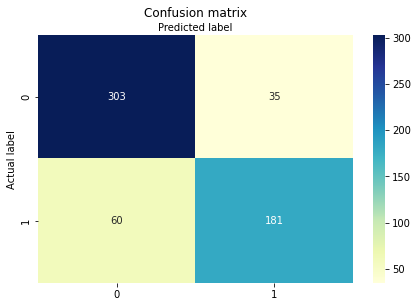

In [ ]:
y_pred_nn = predict(x_test)

cnf_matrix_nn = metrics.confusion_matrix(y_test, y_pred_nn)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_nn))
print("Precision:",metrics.precision_score(y_test, y_pred_nn))
print("Recall:",metrics.recall_score(y_test, y_pred_nn))

Accuracy: 0.8359240069084629
Precision: 0.8379629629629629
Recall: 0.7510373443983402


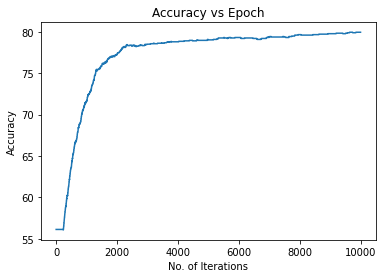

In [ ]:
plt.plot(np.arange(len(accuracy_per_epoch)), accuracy_per_epoch)
plt.xlabel("No. of Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch")
plt.show()

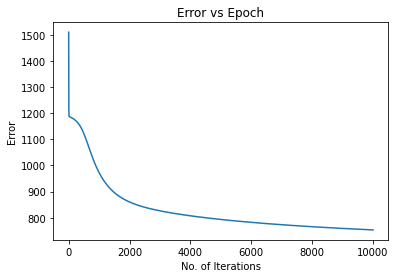

In [ ]:
plt.plot(np.arange(len(accuracy_per_epoch)), error_cost)
plt.xlabel("No. of Iterations")
plt.ylabel("Error")
plt.title("Error vs Epoch")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
predictions = model.predict(x_train)
y_pred_logistic = model.predict(x_test)


Text(0.5, 257.44, 'Predicted label')

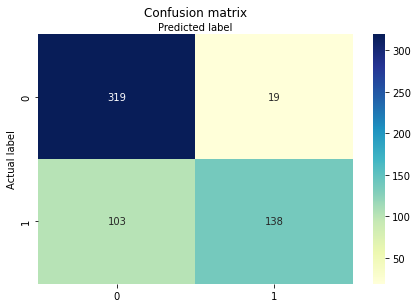

In [ ]:
cnf_matrix_logistic = metrics.confusion_matrix(y_test, y_pred_logistic)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logistic), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logistic))
print("Precision:",metrics.precision_score(y_test, y_pred_logistic))
print("Recall:",metrics.recall_score(y_test, y_pred_logistic))

Accuracy: 0.7892918825561313
Precision: 0.8789808917197452
Recall: 0.5726141078838174


In [ ]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [ ]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000,activation = 'relu',solver='adam',random_state=1)
classifier.fit(x_train, y_train)

MLPClassifier(max_iter=2000, random_state=1)

In [ ]:
y_pred_mlp = classifier.predict(x_test)

Accuracy of MLPClassifier :  0.9740932642487047


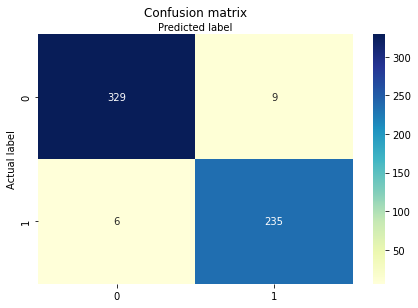

In [ ]:
#Importing Confusion Matrix
#Comparing the predictions against the actual observations in y_val
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_mlp), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm_mlp))

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_mlp))
print("Precision:",metrics.precision_score(y_test, y_pred_mlp))
print("Recall:",metrics.recall_score(y_test, y_pred_mlp))

Accuracy: 0.9740932642487047
Precision: 0.9631147540983607
Recall: 0.975103734439834


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred_dt = clf.predict(x_test)

Text(0.5, 257.44, 'Predicted label')

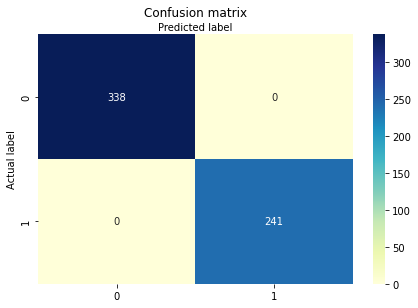

In [ ]:
cnf_matrix_d = metrics.confusion_matrix(y_test, y_pred_dt)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_d), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precision:",metrics.precision_score(y_test, y_pred_dt))
print("Recall:",metrics.recall_score(y_test, y_pred_dt))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [ ]:
#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cnf_matrix_d))

Accuracy of MLPClassifier :  1.0
